In [ ]:
Take a first look at the data
See how many missing data points we have
Figure out why the data is missing
Drop missing values
Filling in missing values

**How many missing data points** 

In [ ]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent=(total_missing/total_cells) * 100

print('Percentage of missing data in San Francisco building permits dataset: {0}'.format(missing_percent))

#Numberof missing value for a particular column
print("Missing values in Zipcode: ", nfl_data["down "])

In [ ]:
def display_only_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    print(missing_data)
display_only_missing(train)
display_only_missing(test)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Real world data is messy and often contains a lot of missing values. There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to

Reason for missing Data
Data doesn't exist
Data not collected due to human error.
Data deleted accidently

In [ ]:
1  Objective
2  Data
3  Loading necessary libraries and datasets
3.1  Reading in the dataset
3.2  Examining the Target column
4  Detecting Missing values
4.1  Detecting missing values numerically
4.2  Detecting missing data visually using Missingno library
4.2.1  Visualizing the locations of the missing data
5  Reasons for Missing Values
5.1  Finding reason for missing data using matrix plot
5.2  Finding reason for missing data using a Heatmap
5.3  Finding reason for missing data using Dendrogram
6  Treating Missing values
6.1  Deletions
6.1.1  Pairwise Deletion
6.1.2  Listwise Deletion/ Dropping rows
6.1.3  Dropping complete columns
6.2  Imputations Techniques for non Time Series Problems
6.3  Imputations Techniques for Time Series Problems
6.3.1  Time Series dataset
6.3.2  Imputing using ffill
6.3.3  Imputation using bfill
6.3.4  Imputation using Linear Interpolation method
6.4  Advanced Imputation Techniques
6.4.1  K-Nearest Neighbor Imputation
6.4.2  Multivariate feature imputation - Multivariate imputation by chained equations (MICE)
7  Algorithms which handle missing values

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
train=pd.read_csv('train.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


In [ ]:
#Examining the Target column
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Detecting missing values numerically
#The first step is to detect the count/percentage of missing values in every column of the dataset. 
#This will give an idea about the distribution of missing values.
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
train_missing= missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [ ]:
test_missing= missing_values_table(test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


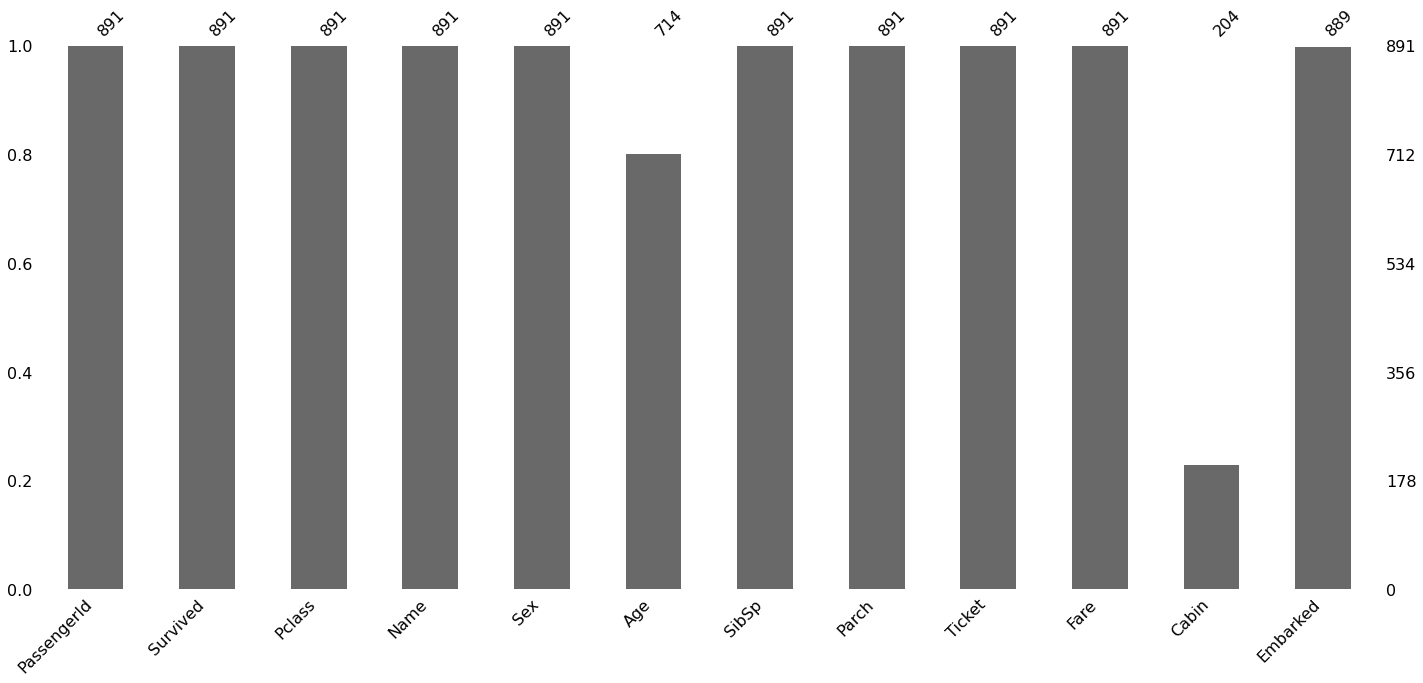

In [ ]:
#Detecting missing data visually using Missingno library
#To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values.
import missingno as msno
msno.bar(train)
#The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that Age, Cabin and embarked columns have missing values. Next,it would make sense to find out the locations of the missing data.

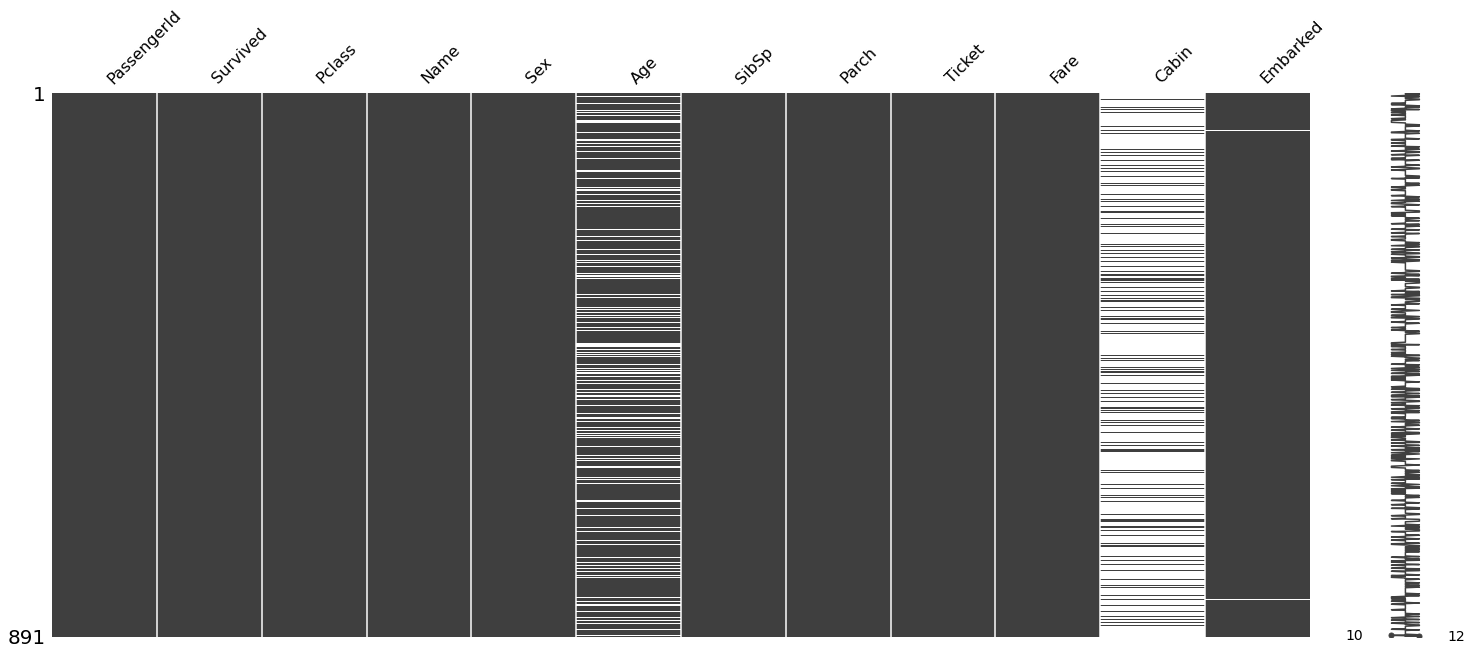

In [ ]:
#Visualizing the locations of the missing data
#The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
msno.matrix(train)
#The plot appears blank(white) wherever there are missing values. For instance, in Embarked column there are only two instances of missing data, hence the two white lines.
#The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

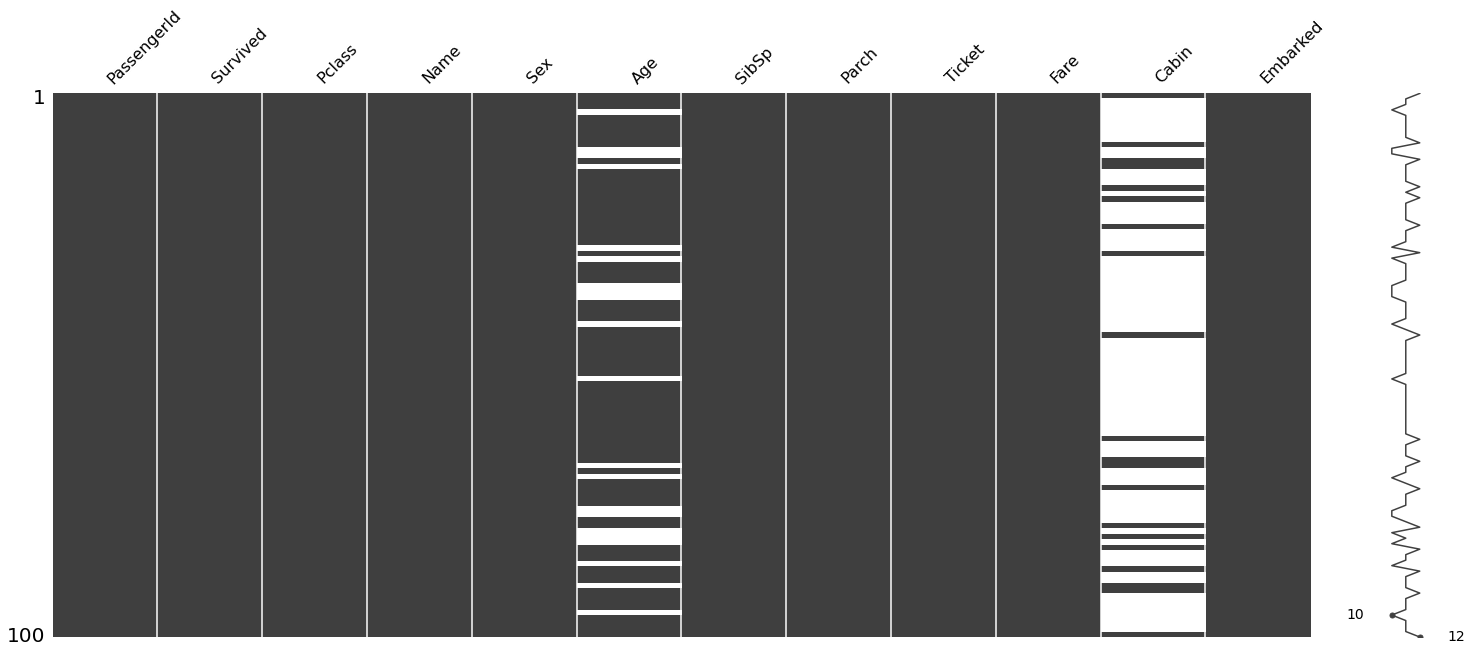

In [ ]:
#It is also possible to sample the dataset to pinpoint the exact location of the missing values. For instance let's check the first 100 rows.
msno.matrix(train.sample(100))

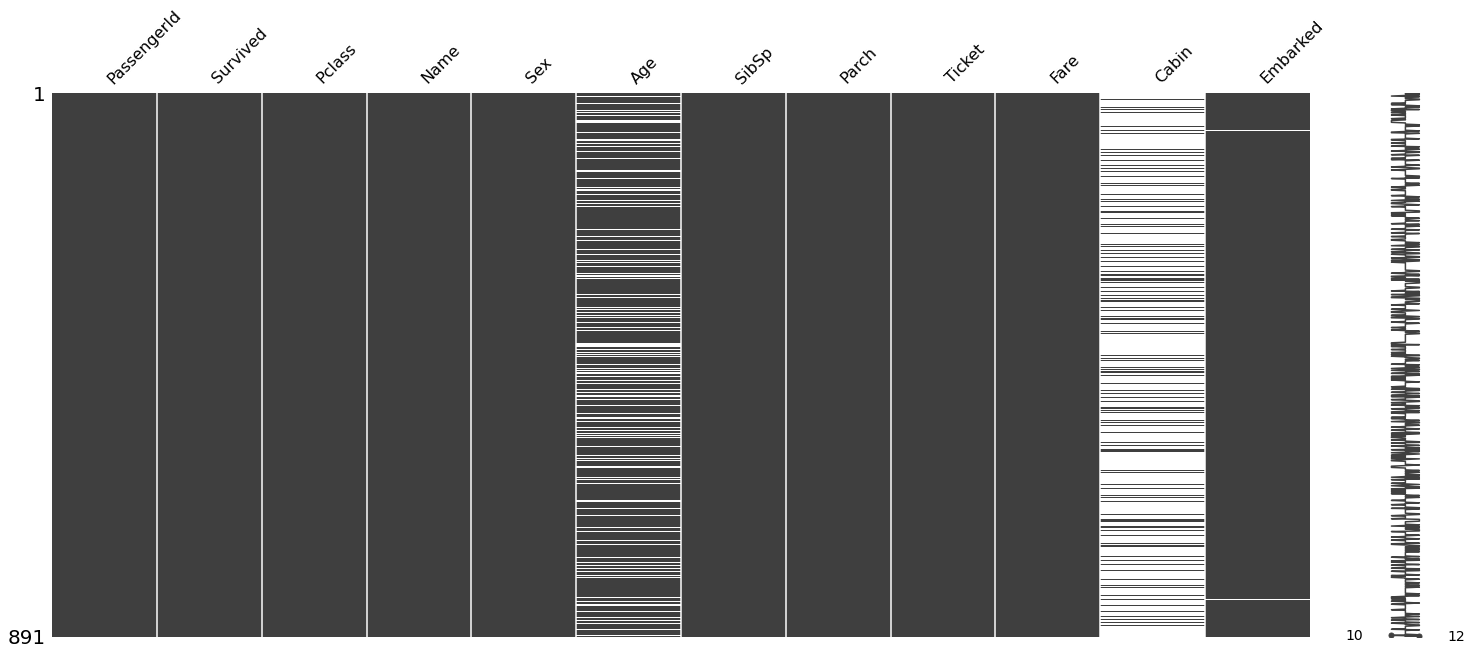

In [ ]:
#Finding reason for missing data using matrix plot
msno.matrix(train)
#The Embarked Column has very few missing values and donot seem to be correlated with any other column, Hence, the missingness in Embarked column can be attributed as Missing Completely at Random.
#Both the Age and the Cabin columns have a lot of missing values.This could be a case of MAR as we cannot directly observe the reason for missingness of data in these columns.

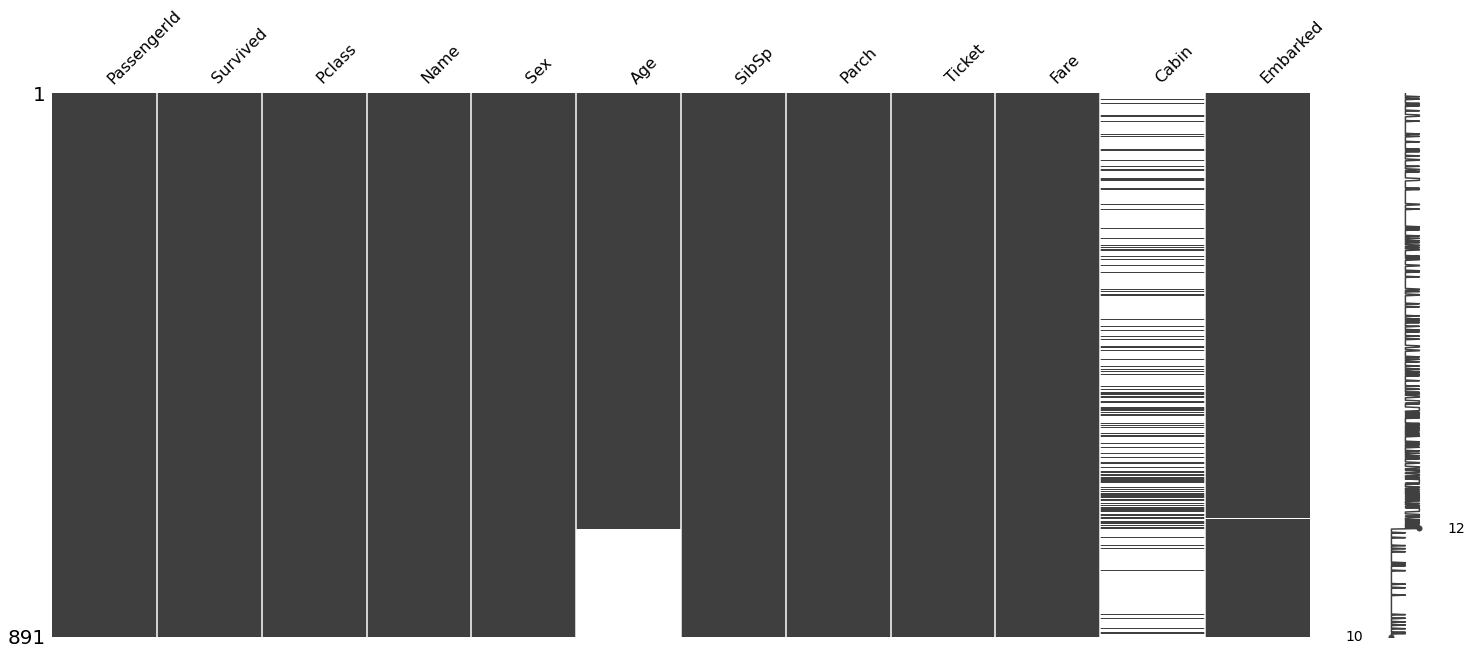

In [ ]:
#The missingno package also let's us sort the graph by a particluar column. 
#Let's sort the values by Age and Cabin column to see if there is a pattern in the missing values
#sorted by Age
sorted = train.sort_values('Age')
msno.matrix(sorted)
#Hence it is clear that here is no relation between the missingness in Age and Cabin column.To cement this conclusion further we can also draw a Heatmap among the different variables in the dataset.

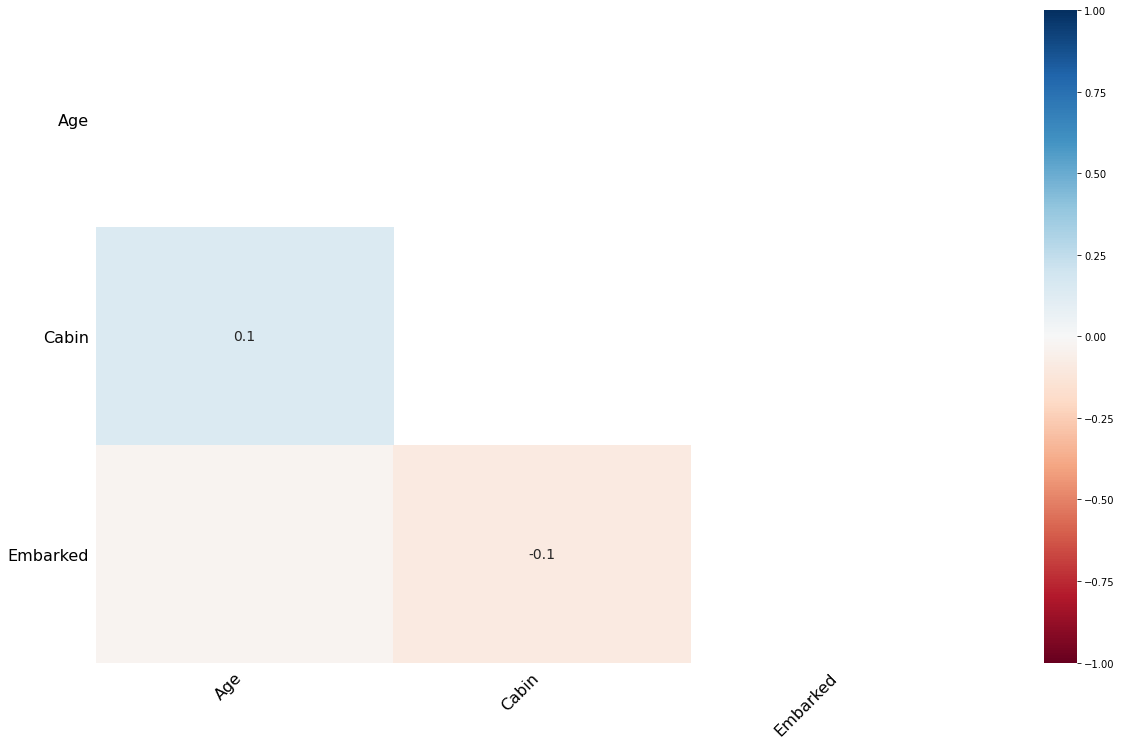

In [ ]:
#Finding reason for missing data using a Heatmap
msno.heatmap(train)

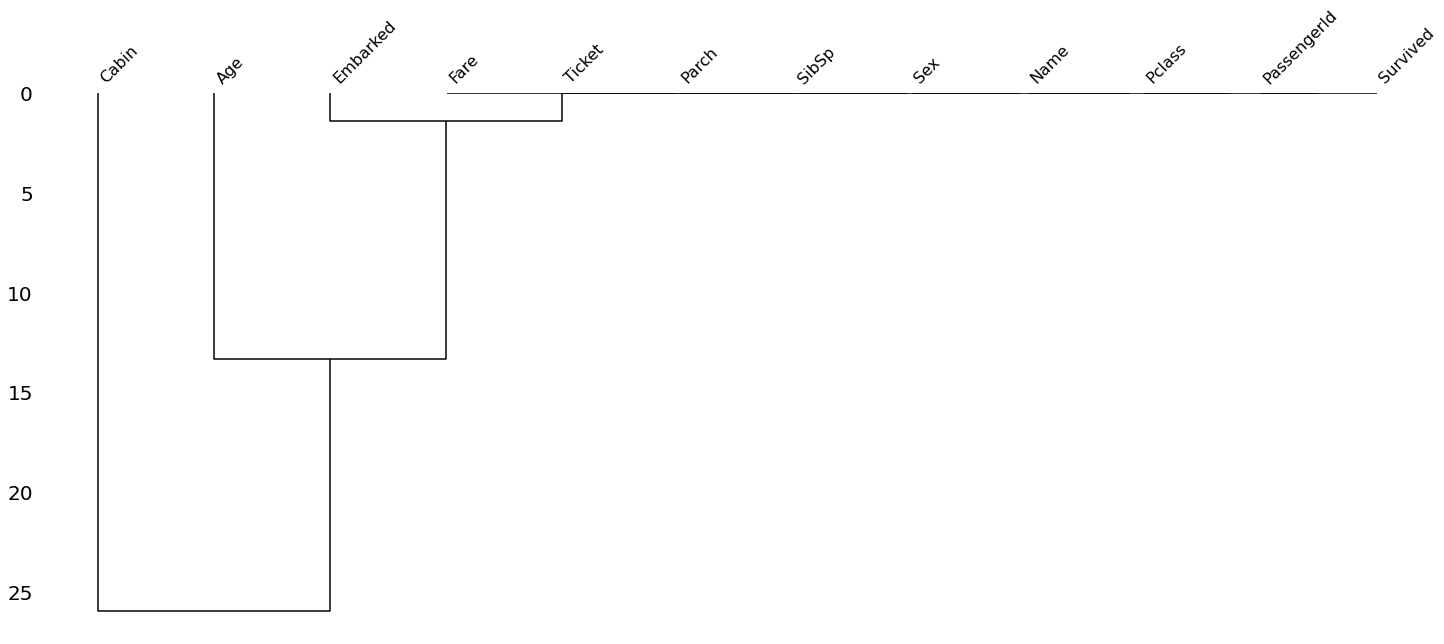

In [ ]:
#Finding reason for missing data using Dendrogram
#A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.
msno.dendrogram(train)
#the missingness of Embarked tends to be more similar to Age than to Cabin and so on.However, in this particluar case, the correlation is high since Embarked column has a very few missing values.

In [ ]:
#Treating Missing values
#Deletions
#Deletions are further of three types:
#Pairwise Deletion
#Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_1 = train.copy()
train_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

In [ ]:
#Listwise Deletion/ Dropping rows
#During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.
#Drop rows which contains any NaN or missing value for Age column
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()
#The Age column doesn't have any missing values.A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

0

In [ ]:
#Dropping complete columns
#If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [ ]:
#Imputations Techniques for non Time Series Problems
#Imputation refers to replacing missing data with substituted values.There are a lot of ways in which the missing values can be imputed depending upon the nature of the problem and data. Dependng upon the nature of the problem, imputation techniques can be broadly they can be classified as follows:

#Basic Imputation Techniques
#Imputating with a constant value
#Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located

In [ ]:
# imputing with a constant

from sklearn.impute import SimpleImputer
train_constant = train.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

In [ ]:
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
#Imputations Techniques for Time Series Problems
#Tackling missing values in time Series problem is a bit different. The fillna() method is used for imputing missing values in such problems.

#Basic Imputation Techniques
#'ffill' or 'pad' - Replace NaN s with last observed value
#'bfill' or 'backfill' - Replace NaN s with next observed value
#Linear interpolation method

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [ ]:
city_day = pd.read_csv('city_day.csv',parse_dates=True,index_col='Date')
city_day1=city_day.copy(deep=True)
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
#Missing Values
city_day_missing= missing_values_table(city_day)
city_day_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


In [ ]:
#There are a lot of missing values and some of the columns like Xylene and PM10 have more than 50% of the values missing. Let's now see how we can impute these missing values
# Imputation using ffill/pad
# Imputing Xylene value

city_day['Xylene'][50:64]
# there are 3 missing values in the Xylene column.

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [ ]:
#Imputing using ffill
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]
#We can see that all missing values have been filled with the last observed values.

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

In [ ]:
#Imputation using bfill
# Imputing AQI value

city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [ ]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]
#We can see that all missing values have been filled with the next observed values.

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [ ]:
#Imputation using Linear Interpolation method
#Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the ebst possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.
#Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [ ]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64

In [ ]:
#Advanced Imputation Techniques
#Advanced imputation techniques uses machine learning algorithms to impute the missing values in a dataset unlike the previous techniques where we used other column values to predict the missing values. We shall look at the following two techniques in this notebook:

#Nearest neighbors imputation
#Multivariate feature imputation

In [ ]:
#K-Nearest Neighbor Imputation
#The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.
train_knn = train.copy(deep=True)

In [ ]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [ ]:
train_knn['Age'].isnull().sum()

0

In [ ]:
#Multivariate feature imputation - Multivariate imputation by chained equations (MICE)
#A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

In [ ]:
train_mice['Age'].isnull().sum()

0

**How to handle missing categorical features?**

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
categorical_features = [feature for feature in df.columns if len(df[feature].unique())<25]
categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSSubClass and number of categories are 15
The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is OverallQual and number of categories are 10
The feature is OverallCond and number of categories are 9
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of catego

In [ ]:
#Identifying missing categorical values
df[categorical_features].isnull().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
LowQualFinSF        0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageFini

In [ ]:
#considering features only with more than 100 missing records
missing_cf= ['Alley','MiscFeature','Fence','PoolQC','FireplaceQu']

In [ ]:
df1 = df[missing_cf]
df1.head(10)

,Alley,MiscFeature,Fence,PoolQC,FireplaceQu
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,TA
2,NaN,NaN,NaN,NaN,TA
3,NaN,NaN,NaN,NaN,Gd
4,NaN,NaN,NaN,NaN,TA
5,NaN,Shed,MnPrv,NaN,NaN
6,NaN,NaN,NaN,NaN,Gd
7,NaN,Shed,NaN,NaN,TA
8,NaN,NaN,NaN,NaN,TA
9,NaN,NaN,NaN,NaN,TA


In [ ]:
#Frequent Categorical Imputation[Mode Imputation]
#Replacing NaN values with the most frequent occurred category in variable/column. First find which category occurs the most and replace all the NaNs with that category.
for feature in missing_cf:
    print(df1[feature].mode())

0    Grvl
dtype: object
0    Shed
dtype: object
0    MnPrv
dtype: object
0    Gd
dtype: object
0    Gd
dtype: object


In [ ]:
for feature in missing_cf:
    df1[feature] = df1[feature].fillna(df1[feature].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.head(10)

,Alley,MiscFeature,Fence,PoolQC,FireplaceQu
0,Grvl,Shed,MnPrv,Gd,Gd
1,Grvl,Shed,MnPrv,Gd,TA
2,Grvl,Shed,MnPrv,Gd,TA
3,Grvl,Shed,MnPrv,Gd,Gd
4,Grvl,Shed,MnPrv,Gd,TA
5,Grvl,Shed,MnPrv,Gd,Gd
6,Grvl,Shed,MnPrv,Gd,Gd
7,Grvl,Shed,MnPrv,Gd,TA
8,Grvl,Shed,MnPrv,Gd,TA
9,Grvl,Shed,MnPrv,Gd,TA


In [ ]:
Disadvantages of this technique:

Features having a max number of null values may bias prediction if replace with the most occurred category.
It distorts the relation of the most frequent label.

In [ ]:
#Create a new cateogory/label for NaN values
#Create a new category for NAN values i.e random category i.e. replace NaN value with a name/label.
df2 = df[missing_cf]
df2.head(10)

,Alley,MiscFeature,Fence,PoolQC,FireplaceQu
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,TA
2,NaN,NaN,NaN,NaN,TA
3,NaN,NaN,NaN,NaN,Gd
4,NaN,NaN,NaN,NaN,TA
5,NaN,Shed,MnPrv,NaN,NaN
6,NaN,NaN,NaN,NaN,Gd
7,NaN,Shed,NaN,NaN,TA
8,NaN,NaN,NaN,NaN,TA
9,NaN,NaN,NaN,NaN,TA


In [ ]:
df2['FireplaceQu'] = np.where(df2['FireplaceQu'].isnull(), "Data Missing",df2['FireplaceQu'] )
df2.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Alley,MiscFeature,Fence,PoolQC,FireplaceQu
0,NaN,NaN,NaN,NaN,Data Missing
1,NaN,NaN,NaN,NaN,TA
2,NaN,NaN,NaN,NaN,TA
3,NaN,NaN,NaN,NaN,Gd
4,NaN,NaN,NaN,NaN,TA
5,NaN,Shed,MnPrv,NaN,Data Missing
6,NaN,NaN,NaN,NaN,Gd
7,NaN,Shed,NaN,NaN,TA
8,NaN,NaN,NaN,NaN,TA
9,NaN,NaN,NaN,NaN,TA


In [ ]:
Advantage:

Simple and easy to implement for categorical variables/columns and preserves the variance.
Disadvantages:

May create random data if the missing category is more.
Doesn’t give good results when missing data is a high percentage of the data.

In [ ]:
#KNN Imputer
#This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set.
#By default, it uses a Euclidean distance metric to impute the missing values.

In [ ]:
df3 = df[missing_cf]
df3.head(10)

,Alley,MiscFeature,Fence,PoolQC,FireplaceQu
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,TA
2,NaN,NaN,NaN,NaN,TA
3,NaN,NaN,NaN,NaN,Gd
4,NaN,NaN,NaN,NaN,TA
5,NaN,Shed,MnPrv,NaN,NaN
6,NaN,NaN,NaN,NaN,Gd
7,NaN,Shed,NaN,NaN,TA
8,NaN,NaN,NaN,NaN,TA
9,NaN,NaN,NaN,NaN,TA


In [ ]:
For this imputation, we first need to perform encoding as does not recognize text data values and will throw error if we do not change these values to numerical values. I am doing mapping, you can also go with LabelEncoding or OneHotEncodin

In [ ]:
df3['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
#Lets take only one features for this one.

df3 = df3[['FireplaceQu']]
df3['FireplaceQu'] = df3['FireplaceQu'].map({'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
df3.head()

,FireplaceQu
0,NaN
1,1.0
2,1.0
3,2.0
4,1.0


In [ ]:
#dummies = pd.get_dummies(df3, drop_first=True)
#dummies.head()

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
df3 = pd.DataFrame(imputer.fit_transform(df3),columns = df3.columns)

In [ ]:
df3.tail(20)

,FireplaceQu
1440,2.000000
1441,1.000000
1442,4.000000
1443,2.000000
1444,1.776623
1445,1.776623
1446,1.776623
1447,1.000000
1448,1.776623
1449,1.776623


In [ ]:
df3.isnull().sum()

FireplaceQu    0
dtype: int64

In [ ]:
There are different ways to handle missing categorical data. Some methods such as removing the entire observation if it has a missing value or replacing the missing values with mean, median or mode values. However, these methods can waste valuable data or reduce the variability of your dataset. In contrast, KNN Imputer maintains the value and variability of your datasets and yet it is more precise and efficient than using the average values.

**Techniques to handle Missing Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install pyts --user

In [ ]:
dict={
    'Gender':['M','M','F','M','M','F',np.nan,'M','M','F','M','M','F','M','F','M',np.nan,'M','M','M'],
    'Height':[189,188,144,np.nan,197,np.nan,189,191,193,138,186,np.nan,137,195,140,190,190,199,190,197],
    'Weight':[87,80,46,79,119,34,104,69,54,40,118,126,50,81,29,95,83,156,np.nan,125],
    'BMI':[2,2,3,2,4,2,3,1,0,3,4,4,4,2,1,3,2,4,4,4]
}
data=pd.DataFrame(dict)
df=data
data

,Gender,Height,Weight,BMI
0,M,189.0,87.0,2
1,M,188.0,80.0,2
2,F,144.0,46.0,3
3,M,NaN,79.0,2
4,M,197.0,119.0,4
5,F,NaN,34.0,2
6,NaN,189.0,104.0,3
7,M,191.0,69.0,1
8,M,193.0,54.0,0
9,F,138.0,40.0,3


In [ ]:
# Listwise Deletion
data.dropna()

,Gender,Height,Weight,BMI
0,M,189.0,87.0,2
1,M,188.0,80.0,2
2,F,144.0,46.0,3
4,M,197.0,119.0,4
7,M,191.0,69.0,1
8,M,193.0,54.0,0
9,F,138.0,40.0,3
10,M,186.0,118.0,4
12,F,137.0,50.0,4
13,M,195.0,81.0,2


In [ ]:
#Pairwise Deletion
data.dropna(subset=['Height','Weight'],axis=0)

,Gender,Height,Weight,BMI
0,M,189.0,87.0,2
1,M,188.0,80.0,2
2,F,144.0,46.0,3
4,M,197.0,119.0,4
6,NaN,189.0,104.0,3
7,M,191.0,69.0,1
8,M,193.0,54.0,0
9,F,138.0,40.0,3
10,M,186.0,118.0,4
12,F,137.0,50.0,4


In [ ]:
#Imputation
#1.Mean / Median
# Imputation using Mean
print('Mean of Height = ',data['Height'].mean())
data['Height'].fillna((data['Height'].mean()))

Mean of Height =  179.58823529411765


0     189.000000
1     188.000000
2     144.000000
3     179.588235
4     197.000000
5     179.588235
6     189.000000
7     191.000000
8     193.000000
9     138.000000
10    186.000000
11    179.588235
12    137.000000
13    195.000000
14    140.000000
15    190.000000
16    190.000000
17    199.000000
18    190.000000
19    197.000000
Name: Height, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3., 1., 0., 0., 0., 0., 0., 1., 7., 5.]),
 array([137. , 143.2, 149.4, 155.6, 161.8, 168. , 174.2, 180.4, 186.6,
        192.8, 199. ]),
 <a list of 10 Patch objects>)

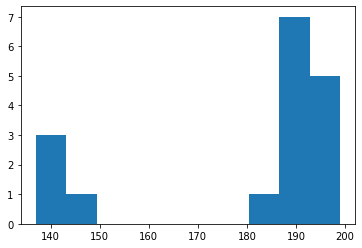

In [ ]:
# Histogram for the feature 'Height'
plt.hist(df['Height'])

In [ ]:
# Imputation using Median
print('Median of Height = ',data['Height'].median())
data['Height'].fillna((data['Height'].median()))

Median of Height =  190.0


0     189.0
1     188.0
2     144.0
3     190.0
4     197.0
5     190.0
6     189.0
7     191.0
8     193.0
9     138.0
10    186.0
11    190.0
12    137.0
13    195.0
14    140.0
15    190.0
16    190.0
17    199.0
18    190.0
19    197.0
Name: Height, dtype: float64

In [ ]:
data.groupby('Gender',as_index=False)['Height'].mean()

,Gender,Height
0,F,139.750000
1,M,192.272727


In [ ]:
# Imputation using Mean based on Category
data['Height'].fillna(data[data['Gender']=='M']['Height'].mean())

0     189.000000
1     188.000000
2     144.000000
3     192.272727
4     197.000000
5     192.272727
6     189.000000
7     191.000000
8     193.000000
9     138.000000
10    186.000000
11    192.272727
12    137.000000
13    195.000000
14    140.000000
15    190.000000
16    190.000000
17    199.000000
18    190.000000
19    197.000000
Name: Height, dtype: float64

In [ ]:
# Imputation based on Mode
data['Gender'].fillna((data['Gender'].mode()[0]))

0     M
1     M
2     F
3     M
4     M
5     F
6     M
7     M
8     M
9     F
10    M
11    M
12    F
13    M
14    F
15    M
16    M
17    M
18    M
19    M
Name: Gender, dtype: object

In [ ]:
# Imputation using a Constant or Unique Category
data['Gender'].fillna('Unknown')

0           M
1           M
2           F
3           M
4           M
5           F
6     Unknown
7           M
8           M
9           F
10          M
11          M
12          F
13          M
14          F
15          M
16    Unknown
17          M
18          M
19          M
Name: Gender, dtype: object

In [ ]:
# Imputation using Zero
visit=pd.DataFrame({
    'webpage':['w1','w2','w3','w4','w5'],
    'visited':[1, 2, np.nan, 5, np.nan]
})
visit['visited'].fillna(0)

0    1.0
1    2.0
2    0.0
3    5.0
4    0.0
Name: visited, dtype: float64

In [ ]:
#Last Observation Carried Forward
#This method fills the last observed non-missing value. This strategy suits for longitudinal data. The method ‘ffill’ in fillna() is used to fill the missing value with last observation data. Similarly, the method ‘bfill’ is used to fill with the next observation data.

data=pd.DataFrame({
    'Weight':[50,50.1,50.3,np.nan,50,50.2,50.1,np.nan,49.5,50]
})
data.fillna(method='ffill')

,Weight
0,50.0
1,50.1
2,50.3
3,50.3
4,50.0
5,50.2
6,50.1
7,50.1
8,49.5
9,50.0


In [ ]:
# Next Observation
data.fillna(method='bfill')

,Weight
0,50.0
1,50.1
2,50.3
3,50.0
4,50.0
5,50.2
6,50.1
7,49.5
8,49.5
9,50.0


In [ ]:
#KNN (K-Nearest Neighbors)
from sklearn.impute import KNNImputer
param=['Height','Weight','BMI']
imputer = KNNImputer(n_neighbors=3)
data[param] = imputer.fit_transform(data[param])
data

,Gender,Height,Weight,BMI
0,M,189.000000,87.000000,2.0
1,M,188.000000,80.000000,2.0
2,F,144.000000,46.000000,3.0
3,M,191.000000,79.000000,2.0
4,M,197.000000,119.000000,4.0
5,F,156.000000,34.000000,2.0
6,NaN,189.000000,104.000000,3.0
7,M,191.000000,69.000000,1.0
8,M,193.000000,54.000000,0.0
9,F,138.000000,40.000000,3.0


In [ ]:
#Unsupervised Learning: K-Means
# Unsupervised Learning
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2, random_state=0).fit(data[param])
model.labels_

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
model.predict([[189,104,3],[190,83,2]])

array([0, 0], dtype=int32)

In [ ]:
#Iterative Imputer
#IterativeImputer class follows multivariate feature imputation. It models the missing value of each feature as a function of other features and the estimate is used for imputation. This is done in a repeated round-robin fashion. At each step, a feature is designated as target feature and the other features are treated as predictors. A regressor is fit and it is used to predict the missing values. 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp=IterativeImputer()
imp.fit(data[param])
test=data[data.isnull().any(axis=1)]
test

,Gender,Height,Weight,BMI
6,NaN,189.0,104.0,3.0
16,NaN,190.0,83.0,2.0


In [ ]:
imp.transform(test[param])

array([[189., 104.,   3.],
       [190.,  83.,   2.]])

In [ ]:
#Interpolation Imputer
#This is an imputation technique that assumes a linear relationship between data points and employs the replacing of missing value based on the computation of non-missing values from adjacent data points. Various strategies could be used as a kind of interpolation. The default is ‘linear’. Other strategies includes ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point.
from pyts.preprocessing import InterpolationImputer
months=[1,2,3,np.nan,np.nan,6,7,8,np.nan,10,11,12]
sales=[140,124,135,132,130,np.nan,131,135,np.nan,138,145,150]
X=[months,sales]
# Linear Imputation (Default)
intImp=InterpolationImputer()
intImp.transform(X)

ModuleNotFoundError: ignored

In [ ]:
# Nearest Imputation
intImp=InterpolationImputer(strategy='nearest')
intImp.transform(X)

In [ ]:
# Zero Imputation
intImp=InterpolationImputer(strategy='zero')
intImp.transform(X)

In [ ]:
intImp=InterpolationImputer(strategy='slinear')
intImp.transform(X)

In [ ]:
intImp=InterpolationImputer(strategy='quadratic')
intImp.transform(X)

In [ ]:
intImp=InterpolationImputer(strategy='cubic')
intImp.transform(X)

**Pima_Indians_Diabetes_EDA_Handle_Missing_Values**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def plot_histograms():
    """ Plot histograms of all features"""
    
    fig, axs = plt.subplots(4, 2, figsize=(22, 18))
    fig.subplots_adjust(hspace = 0.5, wspace=0.2)
    axs = axs.ravel()
    for i in range(8):
        axs[i].hist(data[data['Outcome']==0][data.columns[i]],
                    10, alpha=0.5, label='non-diabetes')
        axs[i].hist(data[data['Outcome']==1][data.columns[i]],
                    10, alpha=0.5, label='diabetes')
        axs[i].set_title(data.columns[i])
        axs[i].legend(loc='upper right')
        axs[i].set_ylabel('Frequency')
        axs[i].grid()

In [ ]:
def plot_bar(data, feature, text='', rotation=False):
    """ Bar plot of a feature """
    
    fig = plt.figure(figsize=(10, 5))
    x = data.index
    y = data[feature]
    plt.bar(x, y)
    plt.title(text, loc='left')
    plt.xlabel('Category')
    if rotation:
        plt.xticks(rotation='vertical')
    plt.grid()
    plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
print('number of samples:', len(data.index))
print('number of features (target included):', len(data.columns))

number of samples: 768
number of features (target included): 9


In [ ]:
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

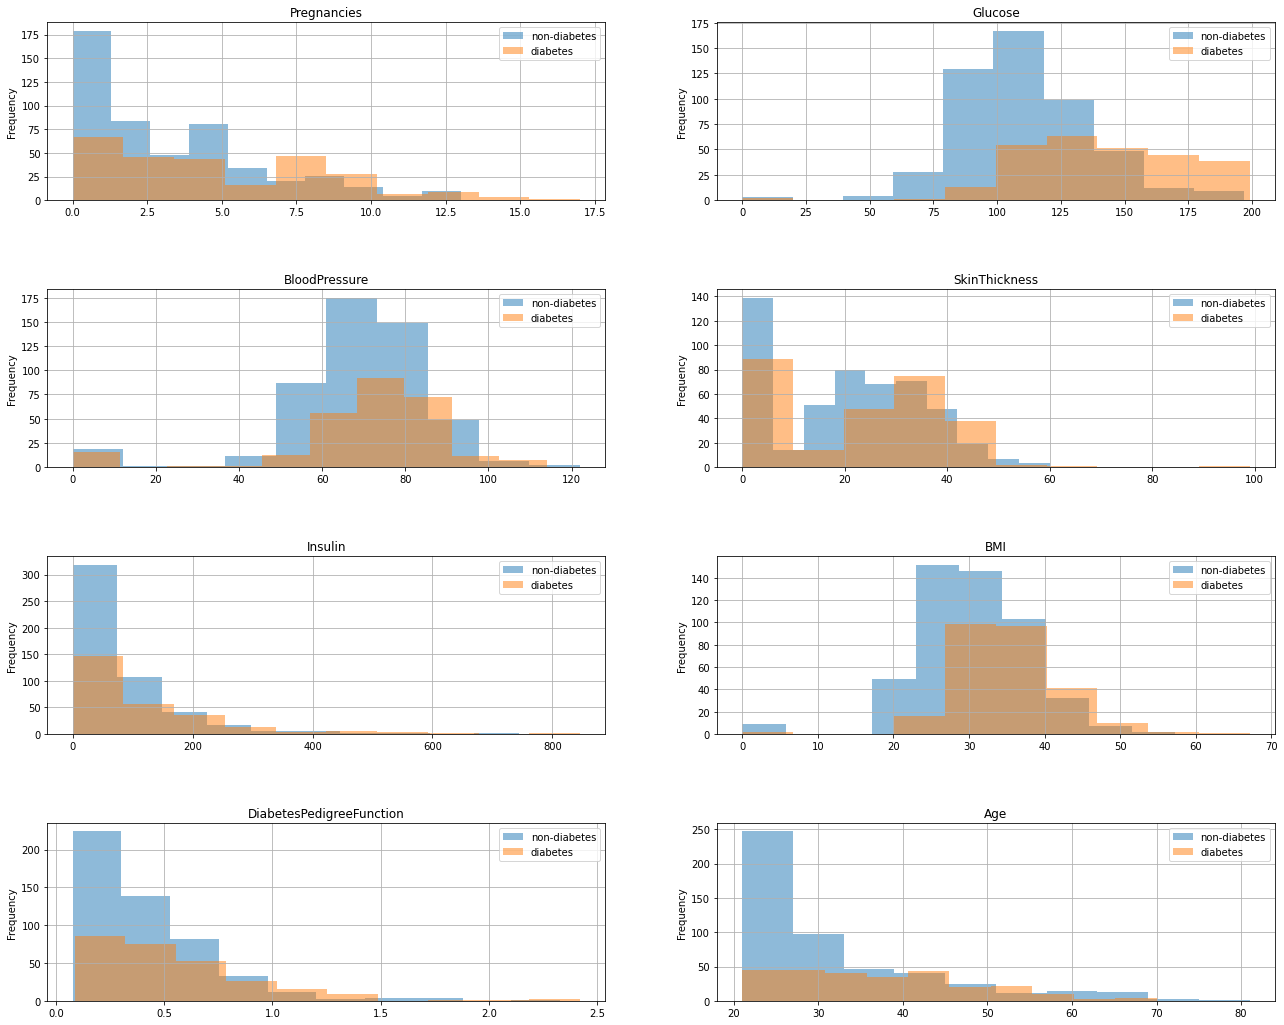

In [ ]:
plot_histograms()

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
features_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
def label_missing_values(s):
    """ Label missing values (=0) with None """
    if s == 0:
        return None
    else:
        return s

In [ ]:
for feature in features_with_missing_values:
    data[feature] = data[feature].apply(label_missing_values)

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#Drop Rows With Missing Values
data_dropped = data.dropna()

In [ ]:
#We compare the mean values of all features and both dataframes.

compare = pd.DataFrame()
compare['origin'] = data.mean()
compare['dropped'] = data_dropped.mean()
compare['delta'] = (compare['dropped']-compare['origin'])/compare['origin']

In [ ]:
#The absolut difference is apparently not significant. But the relative difference is it.

compare

,origin,dropped,delta
Pregnancies,3.845052,3.301020,-0.141489
Glucose,121.686763,122.627551,0.007731
BloodPressure,72.405184,70.663265,-0.024058
SkinThickness,29.153420,29.145408,-0.000275
Insulin,155.548223,156.056122,0.003265
BMI,32.457464,33.086224,0.019372
DiabetesPedigreeFunction,0.471876,0.523046,0.108439
Age,33.240885,30.864796,-0.071481
Outcome,0.348958,0.331633,-0.049650


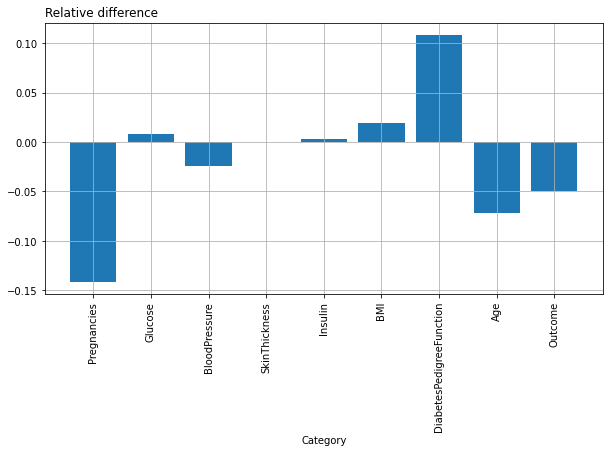

In [ ]:
plot_bar(compare, 'delta', 'Relative difference', rotation=True)

In [ ]:
#Imputing Missing Values
def calculate(X, y):
    """ Calulate the best score of grid search """
    
    knn = KNeighborsClassifier()
    knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
    grid = GridSearchCV(knn, knn_params)
    grid.fit(X, y)
    print(grid.best_score_, grid.best_params_)

In [ ]:
X_origin = data[data.columns[:-1]].fillna(0)
y_origin = data['Outcome']
calculate(X_origin, y_origin)

0.7357185298361768 {'n_neighbors': 7}


In [ ]:
#We calculate the best score of grid search for the dropped data:

X_dropped = data_dropped[data_dropped.columns[:-1]]
y_dropped = data_dropped['Outcome']
calculate(X_dropped, y_dropped)

0.7348263550795197 {'n_neighbors': 7}


In [ ]:
#We fill missing data by the mean of every column and calculate the best score of gird search:

X_mean = data[data.columns[:-1]].fillna(X_dropped.mean(axis=0))
y_mean = data['Outcome']
calculate(X_mean, y_mean)

0.7305576776165011 {'n_neighbors': 7}


In [ ]:
#We fill missing data by the KNN imputer and calculate the best score of grid search:

imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(data[data.columns[:-1]])
y_imputed = data['Outcome']
calculate(X_imputed, y_imputed)

0.7448264154146507 {'n_neighbors': 7}


In [ ]:
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X_imputed)
y_scaled = y_imputed
calculate(X_scaled, y_scaled)

0.7513114336643748 {'n_neighbors': 4}


In [ ]:
#Finally we scale the imputed data and calculate best score of gird search:

imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(data[data.columns[:-1]])
y_imputed = data['Outcome']
calculate(X_imputed, y_imputed)

0.7136321195144724 {'n_neighbors': 4}


In [ ]:
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X_imputed)
y_scaled = y_imputed
calculate(X_scaled, y_scaled)

0.7617434852728971 {'n_neighbors': 7}
